## Part 1: Assumptions for Inferential Regression


In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Duncan.csv'
prestige = pd.read_csv(url)

credit_card = sm.datasets.ccard.load_pandas().data

1. Explore the datasets with a [scatter_matrix](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot) and a [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html).

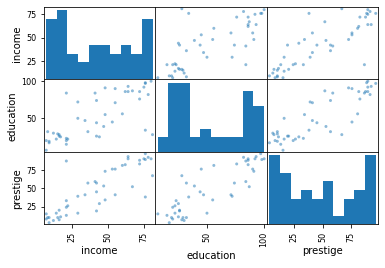

In [3]:
pd.plotting.scatter_matrix(prestige);

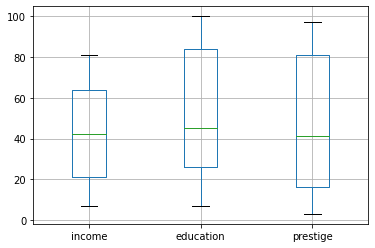

In [4]:
pd.plotting.boxplot(prestige);

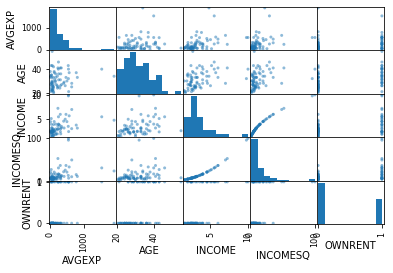

In [5]:
pd.plotting.scatter_matrix(credit_card);

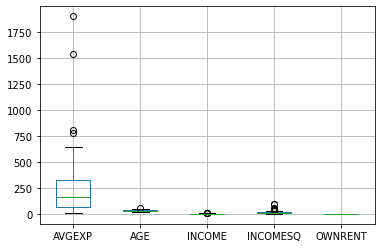

In [6]:
pd.plotting.boxplot(credit_card);

2. Fit a linear regression model to each of the datasets. Print and examine the summaries of the models.  The summary should report the parameter estimates and their standard errors.

In [7]:
prestige_model = smf.glm(formula="prestige ~ income + education",
                         data=prestige)
prestige_results = prestige_model.fit()
prestige_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               prestige   No. Observations:                   45
Model:                            GLM   Df Residuals:                       42
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          178.73
Method:                          IRLS   Log-Likelihood:                -178.98
Date:                Tue, 03 Nov 2020   Deviance:                       7506.7
Time:                        16:31:14   Pearson chi2:                 7.51e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.156     -14.438       2.308
income         0.5987      0.120      5.003      0.000       0.364       0.833
education      0.5458      0.098      5.555      0.000       0.353       0.738
==============================================================================
"""

In [8]:
credit_card_model = smf.glm("AVGEXP ~ AGE + INCOME + INCOMESQ + OWNRENT",
                            credit_card)
credit_card_results = credit_card_model.fit()
credit_card_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 AVGEXP   No. Observations:                   72
Model:                            GLM   Df Residuals:                       67
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          81083.
Method:                          IRLS   Log-Likelihood:                -506.49
Date:                Tue, 03 Nov 2020   Deviance:                   5.4326e+06
Time:                        16:31:14   Pearson chi2:                 5.43e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -237.1465    199.352     -1.190      0.234    -627.869     153.576
AGE           -3.0818      5.515     -0.559      0.576     -13.890       7.727
INCOME       234.3470     80.366      2.916      0.004      76.833     391.861
INCOMESQ     -14.9968      7.469     -2.008      0.045     -29.636      -0.357
OWNRENT       27.9409     82.922      0.337      0.736    -134.584     190.466
==============================================================================
"""

3. Plot the residuals of the models against the predicted values.  Do these residuals show any concerning patterns?  If so, how should you deal with them?
   

In [9]:
prestige_results.predict(prestige)

0     77.998488
1     78.527477
2     89.057018
3     75.990694
4     79.195954
5     52.358775
6     83.016791
7     96.417354
8     81.537986
9     83.985816
10    59.473825
11    92.930755
12    92.384921
13    64.333431
14    72.345398
15    57.997384
16    50.230703
17    60.426005
18    43.098808
19    85.394878
20    50.598630
21    52.695378
22    65.619850
23    38.590284
24    19.062906
25    43.363302
26    57.716045
27    32.956404
28    19.115805
29    33.925429
30    18.745513
31     1.947304
32    33.273797
33     9.694777
34    14.696235
35    17.425405
36    17.706744
37    18.798412
38     8.603109
39    14.325943
40    17.495148
41    17.759643
42     9.043145
43    39.946447
44    16.191885
dtype: float64

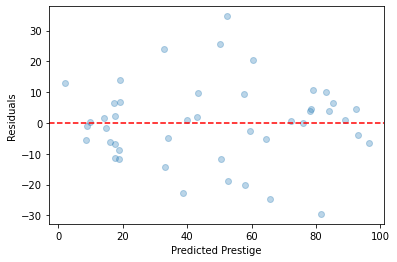

In [10]:
fig, ax = plt.subplots()
predictions = prestige_results.predict(prestige)
ax.scatter(predictions,
           prestige['prestige'] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Prestige')
ax.set_ylabel('Residuals');

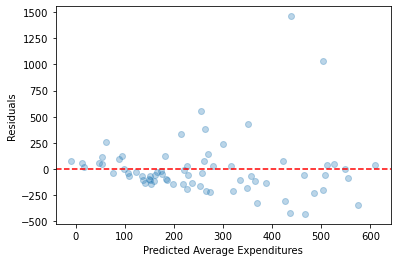

In [11]:
fig, ax = plt.subplots()
predictions = credit_card_results.predict(credit_card)
ax.scatter(predictions,
           credit_card['AVGEXP'] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Average Expenditures')
ax.set_ylabel('Residuals');

 > In the second plot the variance of residuals increases with increasing predictions. This might be fixed by instead predicting the log of the average expenditures.

4. By inspecting the residual plots, which model is more likely to have **heteroscedastic** residuals? Explain what heteroscedasticity means.

 > The second plot is likely has heteroscedastic residuals, meaning the variance of the residuals depends on the exogenous variables.

5. What uses of the model would heteroscedasticity (a violation of homoscedasticity) invalidate?

 > Heteroscedasticity would invalidate the use of the model for inference.

6. One of the most common treatments to reducing heteroscedasticity is to take the logarithm of the response variable, especially if the conditional distribution of the response variable is skewed. Take the log of `AVGEXP` in `ccard` data. Re-fit the model to the logarithm of `AVGEXP`, and re-plot the residuals. 

In [12]:
credit_card['LOGAVGEXP'] = np.log(credit_card['AVGEXP'])
credit_card_log_model = smf.glm("LOGAVGEXP ~ AGE + INCOME + INCOMESQ + OWNRENT",
                                credit_card)
credit_card_log_results = credit_card_log_model.fit()


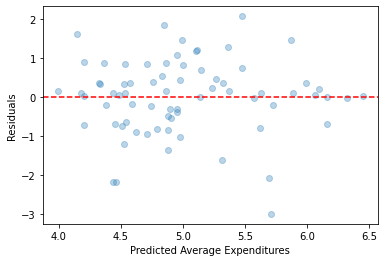

In [13]:
fig, ax = plt.subplots()
predictions = credit_card_log_results.predict(credit_card)
ax.scatter(predictions,
           credit_card['LOGAVGEXP'] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Average Expenditures')
ax.set_ylabel('Residuals');

7. To test if the residuals are normally distributed, the common practice is to use a qq-plot (for quantile-quantile-plot). The Q-Q plot plots the quantile of the normal distribution against that of the residuals and checks for alignment of the quantiles.
    
Make qq-plots for the residuals of the `prestige` and `ccard` (before `log` transform) models (it is assumed you will have to do a bit of research to make these plots, we've intentionally).  Apply the `log` transform to `AVGEXP` in `ccard` and repeat the plot.  What do you observe?

Text(0.5, 1.0, 'QQ Plot vs Normal dist for Prestige Residuals')

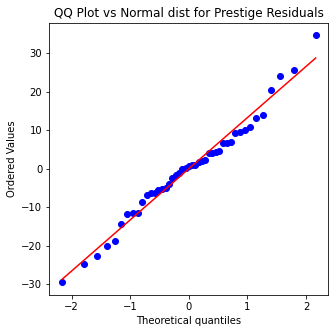

In [14]:
# for the prestige data
fig, ax = plt.subplots(figsize=((5, 5)))
predictions = prestige_results.predict(prestige)
stats.probplot(prestige['prestige'] - predictions,
               plot=ax);
ax.set_title("QQ Plot vs Normal dist for Prestige Residuals")

Text(0.5, 1.0, 'QQ Plot vs Normal dist for Credit Card Log Residuals')

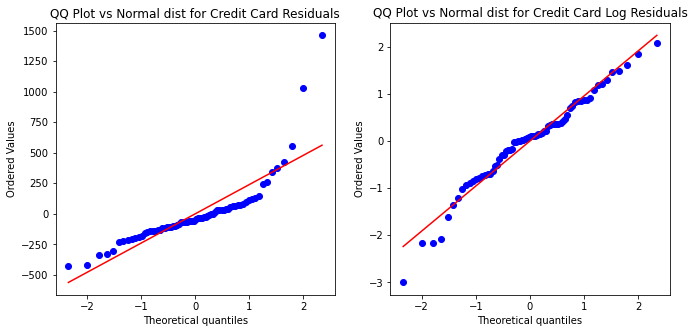

In [15]:
# for the prestige data
fig, axs = plt.subplots(1, 2, figsize=((11,5)))
predictions = credit_card_results.predict(credit_card)
stats.probplot(credit_card['AVGEXP'] - predictions, plot=axs[0]);
axs[0].set_title("QQ Plot vs Normal dist for Credit Card Residuals")

predictions = credit_card_log_results.predict(credit_card)
stats.probplot(credit_card['LOGAVGEXP'] - predictions, plot=axs[1]);
axs[1].set_title("QQ Plot vs Normal dist for Credit Card Log Residuals")

8. The `p_values_` attribute of the model contains the results of applying a z-test to the parameter estimates.  Discuss the following questions with your partner:
  - What assumptions must hold for this z-test to be valid?


> The coefficients must be normally distributed. That will be true as long as the sample is fairly large (and the errors aren't too badly behaved).

  - What is the null hypothesis of this z-test?

> That the corresponding coefficient of the "true model" is zero, so that feature does not affect the result.

  - What is the distribution of the parameter estimates under the null hypothesis?

> Normal, with a standard deviation equal to the standard error.

9. Give some examples of scientific questions that could be answered by these p-values.  Give some examples of questions that are *not* answered by these p-values.

> A question that could be answered: do people with more education have higher-prestige jobs?

> A question that couldn't be answered: will providing someone more education result in them having a higher-prestige job?